In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import keras.backend as K
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'D:\trading\data\datasets\CBOM\1m.csv')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['close'].values.reshape(-1, 1))
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [3]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
look_back = 60
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

In [4]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

d:\trading\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.2)
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

Epoch 1/2
15820/15820 ━━━━━━━━━━━━━━━━━━━━ 290s 18ms/step - loss: 4.1578e-04 - val_loss: 2.7308e-06
Epoch 2/2
15820/15820 ━━━━━━━━━━━━━━━━━━━━ 288s 18ms/step - loss: 4.4691e-06 - val_loss: 1.8890e-06
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step


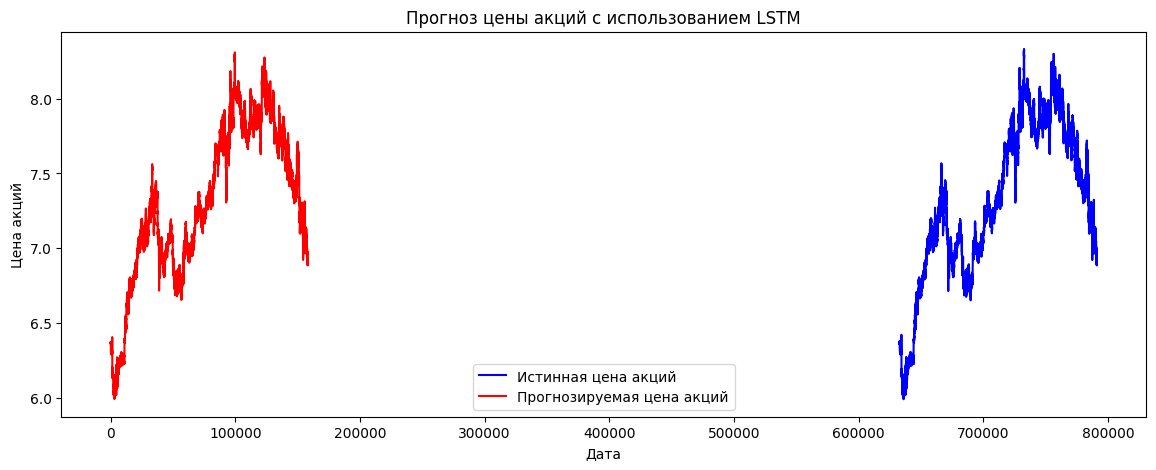

In [6]:
plt.figure(figsize=(14, 5))
plt.plot(data['close'][train_size:], color='blue', label='Истинная цена акций')
plt.plot(predicted_stock_price, color='red', label='Прогнозируемая цена акций')
plt.title('Прогноз цены акций с использованием LSTM')
plt.xlabel('Дата')
plt.ylabel('Цена акций')
plt.legend()
plt.show()

In [9]:
test_data

array([[0.50393501],
       [0.50291952],
       [0.50317339],
       ...,
       [0.63797918],
       [0.63797918],
       [0.63823305]])

In [8]:
def p2(y_true, y_pred):    
    return K.mean(K.square((y_true - y_pred) / (y_true + y_pred)))
p2(test_data['close'], predicted_stock_price) 

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices